In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(-79.05460196062154, 10.643171320470344), (59.08145703264168, 105.84626080462249), (77.14003903502223, 149.22956435086195), (-5.607970098487982, 83.69816079821771), (80.88651462251573, -80.51928748583789), (-56.807105478260816, -152.7926765093135), (-15.024230131020687, 58.2517766253998), (-32.04242045733479, 8.5039888090771), (-2.0387112440791526, 65.11204316709257), (-24.83739633286892, -14.492843905493572), (23.581993028720902, 130.6592375718185), (-54.72094203734424, -61.89548976808054), (-35.24150997003072, 158.77847496671336), (-54.17240321578376, -123.72623882772292), (63.48737216175002, 67.61129430913778), (48.824978661663295, 137.90579620436796), (-76.10030467823927, 100.19786789038488), (-13.092495722721623, -144.36765124437744), (2.290378439443259, 43.61864135914786), (-39.318035805856525, 16.969906975550572), (-74.23419708141813, -76.6112167795616), (-86.47456138689365, -174.37077537109005), (-32.67028511045648, 154.7962080788293), (86.09981464280267, 131.46090310370073), 

In [4]:
from citipy import citipy 

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
import random
from citipy import citipy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=d3e953e6399fe9eca16da902566b3289&q" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | hermanus
Processing Record 2 of Set 13 | markova
Processing Record 3 of Set 13 | chokurdakh
Processing Record 4 of Set 13 | hithadhoo
Processing Record 5 of Set 13 | qaanaaq
Processing Record 6 of Set 13 | mataura
Processing Record 7 of Set 13 | cap malheureux
Processing Record 8 of Set 13 | luderitz
Processing Record 9 of Set 13 | jamestown
Processing Record 10 of Set 13 | nishihara
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | port macquarie
Processing Record 13 of Set 13 | rikitea
Processing Record 14 of Set 13 | oktyabrskoye
Processing Record 15 of Set 13 | troitskoye
Processing Record 16 of Set 13 | albany
Processing Record 17 of Set 13 | atuona
Processing Record 18 of Set 13 | dinsor
City not found. Skipping...
Processing Record 19 of Set 13 | vaini
Processing Record 20 of Set 13 | tiksi
Processing Record 21 of Set 13 | port alfred
Processing Record 22 of Set 13 | teguldet
Processing Record 23 of Set 13 | yellowknife
Pro

Processing Record 41 of Set 16 | vardo
Processing Record 42 of Set 16 | ambilobe
Processing Record 43 of Set 16 | vaitape
Processing Record 44 of Set 16 | avarua
Processing Record 45 of Set 16 | buala
Processing Record 46 of Set 16 | saint anthony
Processing Record 47 of Set 16 | illoqqortoormiut
City not found. Skipping...
Processing Record 48 of Set 16 | crab hill
City not found. Skipping...
Processing Record 49 of Set 16 | aykhal
Processing Record 50 of Set 16 | cherskiy
Processing Record 1 of Set 17 | antofagasta
Processing Record 2 of Set 17 | dymer
Processing Record 3 of Set 17 | kaitangata
Processing Record 4 of Set 17 | samusu
City not found. Skipping...
Processing Record 5 of Set 17 | galveston
Processing Record 6 of Set 17 | te anau
Processing Record 7 of Set 17 | lewistown
Processing Record 8 of Set 17 | sinop
Processing Record 9 of Set 17 | torbay
Processing Record 10 of Set 17 | livny
Processing Record 11 of Set 17 | esmeraldas
Processing Record 12 of Set 17 | rawson
Proce

Processing Record 25 of Set 20 | chinhoyi
Processing Record 26 of Set 20 | kalemie
Processing Record 27 of Set 20 | leningradskiy
Processing Record 28 of Set 20 | aabenraa
Processing Record 29 of Set 20 | halol
Processing Record 30 of Set 20 | mount isa
Processing Record 31 of Set 20 | coahuayana
Processing Record 32 of Set 20 | san quintin
Processing Record 33 of Set 20 | xuanzhou
Processing Record 34 of Set 20 | vodnyy
Processing Record 35 of Set 20 | ambalavao
Processing Record 36 of Set 20 | acajutla
Processing Record 37 of Set 20 | nybro
Processing Record 38 of Set 20 | skibbereen
Processing Record 39 of Set 20 | ketchikan
Processing Record 40 of Set 20 | talnakh
Processing Record 41 of Set 20 | saint-philippe
Processing Record 42 of Set 20 | contai
Processing Record 43 of Set 20 | maniitsoq
Processing Record 44 of Set 20 | maragogi
Processing Record 45 of Set 20 | kiama
Processing Record 46 of Set 20 | samarai
Processing Record 47 of Set 20 | cam ranh
Processing Record 48 of Set 

Processing Record 17 of Set 24 | agadez
Processing Record 18 of Set 24 | paradwip
City not found. Skipping...
Processing Record 19 of Set 24 | armidale
Processing Record 20 of Set 24 | fuyang
Processing Record 21 of Set 24 | atar
Processing Record 22 of Set 24 | grand junction
Processing Record 23 of Set 24 | mopti
Processing Record 24 of Set 24 | pelym
Processing Record 25 of Set 24 | costinesti
Processing Record 26 of Set 24 | arkhangelsk
Processing Record 27 of Set 24 | povenets
Processing Record 28 of Set 24 | vila franca do campo
Processing Record 29 of Set 24 | puerto colombia
Processing Record 30 of Set 24 | hualmay
Processing Record 31 of Set 24 | berlevag
Processing Record 32 of Set 24 | harpalpur
Processing Record 33 of Set 24 | sudova vyshnya
Processing Record 34 of Set 24 | deniliquin
Processing Record 35 of Set 24 | raudeberg
Processing Record 36 of Set 24 | andujar
Processing Record 37 of Set 24 | nanortalik
Processing Record 38 of Set 24 | fort wellington
Processing Reco

In [12]:
len(city_data)

565

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,73.99,55,45,3.00,ZA,2021-01-10 13:26:06
1,Markova,48.6758,24.4138,33.80,69,75,4.47,UA,2021-01-10 13:26:06
2,Chokurdakh,70.6333,147.9167,-28.34,86,100,6.24,RU,2021-01-10 13:26:06
3,Hithadhoo,-0.6000,73.0833,81.63,72,100,10.00,MV,2021-01-10 13:26:06
4,Qaanaaq,77.4840,-69.3632,-1.70,75,0,6.80,GL,2021-01-10 13:26:06
5,Mataura,-46.1927,168.8643,54.00,73,93,14.00,NZ,2021-01-10 13:26:06
6,Cap Malheureux,-19.9842,57.6142,82.99,74,12,10.00,MU,2021-01-10 13:26:06
7,Luderitz,-26.6481,15.1594,77.05,46,53,29.80,NA,2021-01-10 13:26:06
8,Jamestown,42.0970,-79.2353,27.00,93,90,8.05,US,2021-01-10 13:26:06
9,Nishihara,26.1842,127.7558,57.20,71,75,9.22,JP,2021-01-10 13:26:06


In [29]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [30]:
city_data_df = city_data_df[new_column_order]

In [31]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-01-10 13:26:06,-34.4187,19.2345,73.99,55,45,3.00
1,Markova,UA,2021-01-10 13:26:06,48.6758,24.4138,33.80,69,75,4.47
2,Chokurdakh,RU,2021-01-10 13:26:06,70.6333,147.9167,-28.34,86,100,6.24
3,Hithadhoo,MV,2021-01-10 13:26:06,-0.6000,73.0833,81.63,72,100,10.00
4,Qaanaaq,GL,2021-01-10 13:26:06,77.4840,-69.3632,-1.70,75,0,6.80


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [33]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1610367749.2036226

In [35]:
today = time.strftime("%x")
today

'01/11/21'

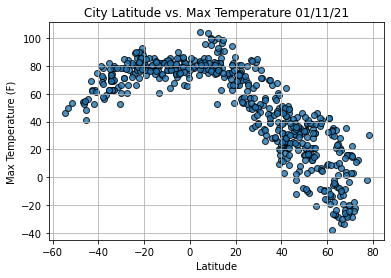

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

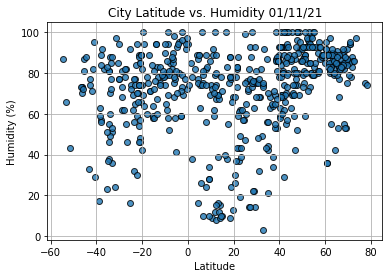

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

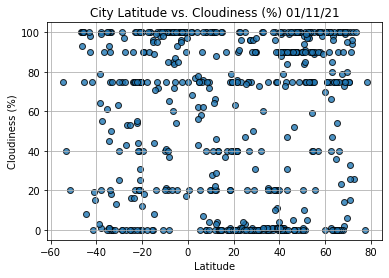

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

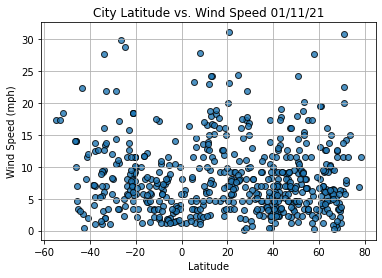

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()